In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
cols = ["V1","V2","V3","V4", "V5", "Target"]
assignment = pd.read_csv("Assignment.csv", encoding='utf-8', header=None, names=cols)

In [3]:
assignment = assignment.iloc[1:,:-1] # to skip the header and label

In [4]:
assignment.describe() # why is this not showing all details?

,V1,V2,V3,V4,V5
count,748,748,748,748,748
unique,32,33,33,78,1
top,2.0,1.0,250.0,4.0,NEGATIVE
freq,171,158,158,57,748


In [5]:
#how many features have unknowns; and what's the total number of unknowns
print((assignment['V1'] == "?").sum())
print((assignment['V2'] == "?").sum())
print((assignment['V3'] == "?").sum())
print((assignment['V4'] == "?").sum())
print((assignment['V5'] == "?").sum())

5
5
0
0
0


In [6]:
assignment.replace("?", 0, inplace=True) # replace all ? by np.nan
assignment.replace('NEGATIVE', 1, inplace=True)

In [7]:
V1 = assignment['V1'].astype(float)
V2 = assignment['V2'].astype(float)
V3 = assignment['V3'].astype(float)
V4 = assignment['V4'].astype(float)
V5 = assignment['V5'].astype(float)

In [8]:
print(np.var(V1), np.var(V2), np.var(V3), np.var(V4), np.var(V5))

65.5868966084245 33.565643855986664 2128245.173403577 593.4297860247633 0.0


In [9]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si.fit_transform(assignment)[:,1].mean()

5.427807486631016

In [10]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
knn.fit_transform(assignment)[:,0].mean()

9.498663101604278

{'whiskers': [<matplotlib.lines.Line2D at 0x28437073d90>,
 'caps': [<matplotlib.lines.Line2D at 0x2843708e430>,
 'boxes': [<matplotlib.lines.Line2D at 0x28437073940>],
 'medians': [<matplotlib.lines.Line2D at 0x2843708eb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2843708eee0>],
 'means': []}

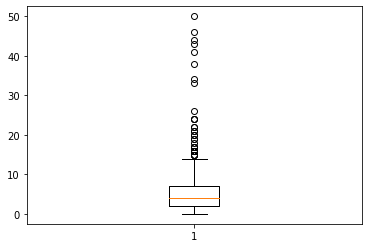

In [11]:
plt.boxplot(V2) #has the least number of outliers compared to V2 and V3